## 1. Business Understanding 
### i. Objective:
The main aim of this project is to develop a machine learning model of water well functionality status in Tanzania. This project predicts whether a well is functional, non-functional, or functional but needing repair, and therefore enhances the allocation of resources for repairs and maintenance. This particular initiative is crucial to make sure that the people of Tanzania obtain clean and potable water - a crucial element in health, economic growth and personal well being.

For NGOs and government agencies, this model provides data-driven decision making. By repairing existing water points first rather than building new ones, organizations can avoid duplication of effort, increase the life of infrastructure, reduce costs, avoid redundancies, and support sustainable water access in Tanzania in line with SDG 6:Clean Water and Sanitation. 

### ii. Specific Objectives:
a. Create a Classification Model: Create a machine learning model of water well status as functional, non-functional, or repairable.

b. Improve Allocation of Resources: Use the model's predictions to allocate resources for well maintenance and repair, focusing on existing wells instead of new constructions.

c. Provide insights for NGOs and government agencies to contribute to the SDGs and SDG 6: Clean Water and Sanitation, by maintaining and improving existing water infrastructure.

## 2. Data Understanding
### i. Data Description:
The dataset provided by DrivenData contains information on over 59,000 water points across Tanzania, collected by the ministy of water of Tanzania. It includes geographic data, operational details, and management information, which are crucial for understanding the factors that influence the functionality of water points. The goal is to use this data to build a model that predicts the operational status of each water point, providing actionable insights for improving water access and infrastructure management.

### ii. Justification for Data Source: 
There are a number of reasons why this dataset was selected, including:

- ***Relevance:***  The dataset directly tackles the project's main topic, which is the issue of water well functionality. The inclusion of characteristics including management data, well design details, and geographic data is essential for creating a prediction model that can reliably categorize the state of water wells.

- ***Credibility:***  The data was collected by the Ministry of Water in Tanzania, a government agency in charge of overseeing the nation's water resources, making it trustworthy and authoritative

- ***Comprehensiveness:***  The dataset has more than 59,000 records, making it large enough to support in-depth analysis and model training. 

- ***Real-World Impact:***  Since the dataset accurately depicts the situation in Tanzania, the project's results could directly affect millions of people's access to water. The insights and models produced with real-world data have a higher chance of being useful to stakeholders.

### iii. Features Overview
Understanding these features will allow us to develop a robust predictive model that guides interventions to maintain and improve water access in Tanzania.

- **amount_tsh**: Total static head (amount of water available).
- **date_recorded**: Date the data was recorded.
- **funder**: Organization that funded the well.
- **gps_height**: Altitude of the well.
- **installer**: Organization that installed the well.
- **longitude**: GPS coordinate (longitude).
- **latitude**: GPS coordinate (latitude).
- **wpt_name**: Name of the water point.
- **num_private**: (Not defined).
- **basin**: Geographic water basin.
- **subvillage**: Name of the sub-village.
- **region**: Region where the well is located.
- **region_code**: Coded region number.
- **district_code**: Coded district number.
- **lga**: Local Government Authority.
- **ward**: Ward where the well is located.
- **population**: Population around the well.
- **public_meeting**: Whether a public meeting was held (True/False).
- **recorded_by**: Organization recording the data.
- **scheme_management**: Entity managing the water point.
- **scheme_name**: Name of the management scheme.
- **permit**: Whether the water point is permitted (True/False).
- **construction_year**: Year the well was constructed.
- **extraction_type**: The extraction method used (e.g., hand pump, gravity).
- **extraction_type_group**: Grouped extraction types.
- **extraction_type_class**: Class of extraction method.
- **management**: How the water point is managed.
- **management_group**: Grouped management types.
- **payment**: Type of payment required (e.g., per bucket, monthly).
- **payment_type**: Grouped payment types.
- **water_quality**: The quality of the water.
- **quality_group**: Grouped water quality.
- **quantity**: Quantity of water available.
- **quantity_group**: Grouped quantity of water.
- **source**: The source of the water (e.g., spring, river).
- **source_type**: Grouped source types.
- **source_class**: Class of the water source.
- **waterpoint_type**: Type of water point (e.g., communal standpipe, hand pump).
- **waterpoint_type_group**: Grouped water point types.





####  Loading the Data
We'll load the training data (both features and labels) and the test data, then merge the  training data with labels to include the target variable

In [48]:
# Import necessary libraries
import pandas as pd

# Load the datasets with shorter names
df_train = pd.read_csv('data/train_values.csv')
df_labels = pd.read_csv('data/train_labels.csv')
df_test = pd.read_csv('data/test_values.csv')  #Used for making predictions once the model is trained.
df_sub = pd.read_csv('data/submission_format.csv')

# **Merge the training data with labels to include the target variable**
df_train = pd.merge(df_train, df_labels, on='id')


### Inspect the Data
Now that the data is loaded, let’s proceed with inspecting the datasets to understand their structure and contents.

Inspect the Structure and First Few Rows
Let's start by examining the structure of the datasets.

In [49]:
# Display basic information about the datasets
print("Training Set Values Info:")
df_train.info()

print("\nTraining Set Labels Info:")
df_labels.info()

print("\nTest Set Values Info:")
df_test.info()

# Display the first few rows of each dataset
print("\nTraining Set Values (First 5 Rows):")
display(df_train.head())

print("\nTraining Set Labels (First 5 Rows):")
display(df_labels.head())

print("\nTest Set Values (First 5 Rows):")
display(df_test.head())

print("\nSubmission Format (First 5 Rows):")
display(df_sub.head())


Training Set Values Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional



Training Set Labels (First 5 Rows):


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional



Test Set Values (First 5 Rows):


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe



Submission Format (First 5 Rows):


,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


Exploring the Target Variable: status_group
We'll examine the distribution of the status_group variable to understand how the classes are distributed.

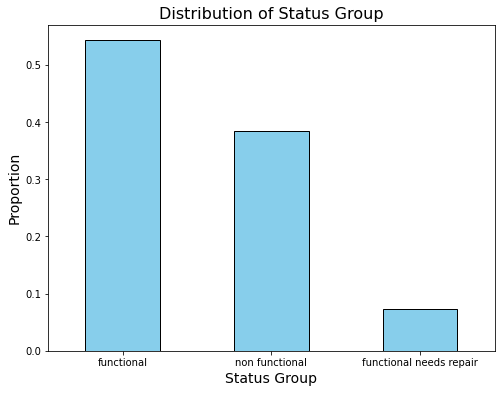

In [50]:
# Explore the distribution of the target variable
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
df_labels['status_group'].value_counts(normalize=True).plot(
    kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))

plt.title('Distribution of Status Group', fontsize=16)
plt.xlabel('Status Group', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=0)
plt.show()


As we can see, the largest proportion, representing water wells that are fully operational. This step was crucial for understanding the distribution of the target variable and identifying potential issues related to class imbalance. Addressing this imbalance is necessary to build a model that performs well across all classes, especially in scenarios where minority classes are critical. 
this imbalance will be addressed during the modeling phase

## 3. Data Cleaning 
Now that we have a good understanding of the data, we'll proceed with data cleaning and preparation

### i.  Identifying Missing Values
First, let's identify and handle any missing values in the dataset. 

In [51]:
# Identify and display the number of missing values in each column of the training set
print("Missing values in the training set:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])


Missing values in the training set:
funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64


### ii. Handling missing values

After identifying the columns with missing values and determining that they are all categorical, we will now create a function that fills these missing values with the placeholder 'unknown'.
This method was selected to prevent loss of data in important features and to create a dataset that can allow us to work on the model without data loss or significant data alterations that would happen if for instance NaNs were filled with mode. 
 To ensure the original data remains intact, we will first create copies of the DataFrames. This allows us to safely modify the data without altering the original datasets.

In [52]:
# Step 1: Create copies of the original DataFrames
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

# Step 2: Define a function to fill missing categorical values with 'unknown'
def fill_missing_categorical(df):
    """
    This function identifies categorical columns in the given DataFrame that have missing values
    and fills those missing values with the placeholder 'unknown'.
    """
    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical) and has missing values
        if df[col].dtype == 'object' and df[col].isnull().sum() > 0:
            # Fill missing values with the placeholder 'unknown'
            df[col].fillna('unknown', inplace=True)

# Step 3: Apply the function to both the training and test dataset copies
fill_missing_categorical(df_train_copy)
fill_missing_categorical(df_test_copy)

# Step 4: Verify that there are no more missing values in the categorical columns
print("Missing values in the copied training set after filling:")
print(df_train_copy.isnull().sum())

print("\nMissing values in the copied test set after filling:")
print(df_test_copy.isnull().sum())


Missing values in the copied training set after filling:
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           

After imputing the datasets with a placeholder, we explore the datatypes to identify further needs

In [53]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
# View the first 5 rows of the training DataFrame
df_train_copy.head()

# View the first 5 rows of the test DataFrame
df_test_copy.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,unknown,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,unknown,1567,unknown,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,unknown,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,unknown,GeoData Consultants Ltd,VWC,unknown,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,unknown,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


### iii. Data format Standardization
#### a. Date_recorded' to datetime format
In this step, we focus on converting the date_recorded column from an object type to a datetime type. This conversion is essential for enabling future date-related feature extraction, such as deriving the year, month, or calculating the time difference between the well's construction and the recorded date.

In [54]:
# Convert 'date_recorded' to datetime format in both training and test datasets
df_train_copy['date_recorded'] = pd.to_datetime(df_train_copy['date_recorded'])
df_test_copy['date_recorded'] = pd.to_datetime(df_test_copy['date_recorded'])

# Verify the data type of the 'date_recorded' column in the training set
print("Data type of 'date_recorded' in the training set:")
print(df_train_copy['date_recorded'].dtype)

# Verify the data type of the 'date_recorded' column in the test set
print("\nData type of 'date_recorded' in the test set:")
print(df_test_copy['date_recorded'].dtype)


Data type of 'date_recorded' in the training set:
datetime64[ns]

Data type of 'date_recorded' in the test set:
datetime64[ns]


#### b. Converting public_meeting and permit to Boolean
The public_meeting and permit columns currently store True/False values as strings (object data type). Converting these columns to the boolean data type will enhance consistency and clarity in our dataset. This ensures that these values are treated as binary variables, which is appropriate given their content

In [55]:
# Convert 'public_meeting' and 'permit' to boolean type
df_train_copy['public_meeting'] = df_train_copy['public_meeting'].astype('bool')
df_test_copy['public_meeting'] = df_test_copy['public_meeting'].astype('bool')

df_train_copy['permit'] = df_train_copy['permit'].astype('bool')
df_test_copy['permit'] = df_test_copy['permit'].astype('bool')

### iv. Data Preprocessing

#### a. Feature engineering 
Feature engineering is a crucial step that involves creating new features or modifying existing ones to better capture the underlying patterns in the data. In this project, we will perform feature engineering on the date_recorded column to extract useful date-related features. These features can provide valuable insights and improve the performance of our predictive models.

Step 1: Extract Year and Month from date_recorded
The date_recorded column contains the date on which the data was recorded. By extracting the year and month from this column, we can create new features that may reveal seasonal patterns or trends over time.

Step 2: Calculate Time Since Construction
The difference between the construction_year and date_recorded columns can be used to calculate the age of the water point at the time of data recording. This new feature, representing the "time since construction," could be a critical factor in determining the functionality of the water point.



In [57]:
import numpy as np
# List of DataFrames to process
dataframes = [df_train_copy, df_test_copy]

# Loop through each DataFrame to apply the feature engineering steps
for df in dataframes:
    # Step 1: Extract year and month from 'date_recorded'
    df['year_recorded'] = df['date_recorded'].dt.year
    df['month_recorded'] = df['date_recorded'].dt.month
    
    # Step 2: Calculate time since construction
    df['time_since_construction'] = df['year_recorded'] - df['construction_year']
    # Replace unrealistic time since construction with NaN (if necessary)
    df['time_since_construction'] = df['time_since_construction'].replace({2013: np.nan})  # Adjust if needed

In [58]:
df_train_copy.head(1)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,time_since_construction
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,12.0


In [59]:
df_test_copy.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,time_since_construction
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,unknown,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2,1.0


### b. Encoding Categorical Variables
#### Step 1: Inspect Unique Values
Before we proceed with encoding or transforming data types, we first need to inspect the unique values in the categorical columns. This will help us verify if these columns are correctly categorized as object types, and it will also help us identify any potential issues with the data.

In [73]:
# Step 1: Count the number of unique values for each object-type column in the training set
print("Training Set - Count of Unique Values for Categorical Columns")
for col in df_train_copy.select_dtypes(include=['object']).columns:
    print(f"Column: {col} - Unique Values: {df_train_copy[col].nunique()}")
    
# Repeat the same process for the test set
print("\nTest Set - Count of Unique Values for Categorical Columns")
for col in df_test_copy.select_dtypes(include=['object']).columns:
    print(f"Column: {col} - Unique Values: {df_test_copy[col].nunique()}")


Training Set - Count of Unique Values for Categorical Columns
Column: funder - Unique Values: 1898
Column: installer - Unique Values: 2145
Column: wpt_name - Unique Values: 37400
Column: basin - Unique Values: 9
Column: subvillage - Unique Values: 19288
Column: region - Unique Values: 21
Column: lga - Unique Values: 125
Column: ward - Unique Values: 2092
Column: scheme_management - Unique Values: 13
Column: scheme_name - Unique Values: 2697
Column: extraction_type - Unique Values: 18
Column: extraction_type_group - Unique Values: 13
Column: extraction_type_class - Unique Values: 7
Column: management - Unique Values: 12
Column: management_group - Unique Values: 5
Column: payment - Unique Values: 7
Column: payment_type - Unique Values: 7
Column: water_quality - Unique Values: 8
Column: quality_group - Unique Values: 6
Column: quantity - Unique Values: 5
Column: quantity_group - Unique Values: 5
Column: source - Unique Values: 10
Column: source_type - Unique Values: 7
Column: source_class

Dropping the recorded_by Column
The recorded_by column contains only a single unique value across both the training and test datasets. Since it does not contribute any variance or useful information for our predictive modeling, we can safely drop it from both datasets.

In [72]:
# Drop the 'recorded_by' column from both the training and test datasets
df_train_copy.drop(columns=['recorded_by'], inplace=True, errors='ignore')
df_test_copy.drop(columns=['recorded_by'], inplace=True, errors='ignore')


Step 2: Check for Numeric Data Stored as Strings
Sometimes numeric data is mistakenly stored as strings. We will check if any of the categorical columns are storing numeric data as strings, which would indicate that those columns should be converted to numeric types (e.g., int or float).

In [65]:
# Check for numeric data stored as strings in the training set
print("Training Set - Numeric Data Stored as Strings")
for col in df_train_copy.select_dtypes(include=['object']).columns:
    if df_train_copy[col].str.isnumeric().any():
        print(f"Column {col} contains numeric data stored as strings.")
        
# Repeat the same process for the test set
print("Test Set - Numeric Data Stored as Strings")
for col in df_test_copy.select_dtypes(include=['object']).columns:
    if df_test_copy[col].str.isnumeric().any():
        print(f"Column {col} contains numeric data stored as strings.")


Training Set - Numeric Data Stored as Strings
Column funder contains numeric data stored as strings.
Column installer contains numeric data stored as strings.
Column wpt_name contains numeric data stored as strings.
Column subvillage contains numeric data stored as strings.
Test Set - Numeric Data Stored as Strings
Column funder contains numeric data stored as strings.
Column installer contains numeric data stored as strings.
Column wpt_name contains numeric data stored as strings.
Column subvillage contains numeric data stored as strings.
